# Problem Statement 1:

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
df.shape

(10, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [7]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

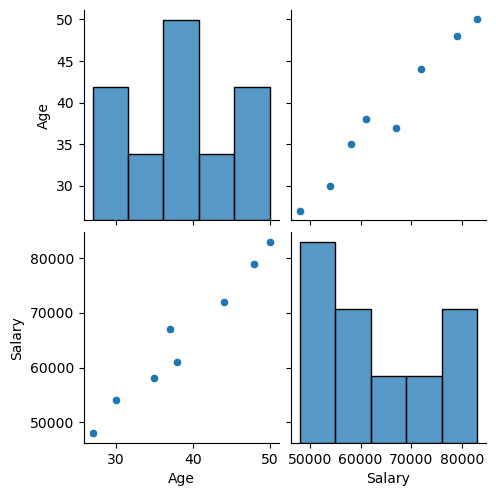

In [8]:
sns.pairplot(df)

In [9]:
# Independent and Dependent variables

X = df.iloc[:,:-1].values

y = df.iloc[:,-1].values

In [10]:
X.shape , y.shape

((10, 3), (10,))

In [11]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [12]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((6, 3), (4, 3), (6,), (4,))

### Multiple Linerar Regression Model Building

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

ValueError: could not convert string to float: 'Spain'

In [ ]:
y_pred = reg.predict(X_test)
y_pred

In [ ]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='red')

1 = 180.38

2 = 1312.07

3 = 440.13

4 = 343.72

In [ ]:
reg.predict([[0.34,0.68]])

In [ ]:
reg.predict([[0.33,0.19]])

In [ ]:
from sklearn import metrics as sm

In [ ]:
# Model Performance
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

### Polynomial Regression Model Building

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lg1 = LinearRegression()
lg1.fit(X_poly,y_train)

In [ ]:
y_pred1 = lg1.predict(poly_reg.fit_transform(X_test))
y_pred1

In [ ]:
plt.scatter(y_pred1,y_test,color='red')
plt.plot(y_pred1,y_test,color='blue')

### Conclusion
1. I have used Multiple Linear regression model and Polynomial Regression model. As I have plotted scatter-plot for these two models , it is seen that Polynomial regression model gives best regression line. 
2. Almost all the points are on the regression line,hence Polynomial regression model is best to decide "price per square foot" .

3. Hence, for these DataSet ,Polynomial Regression model is more accurate than Multiple Linear regression model

# Problem Statement 2

### Importing Dataset

In [ ]:
data = {'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [ ]:
df2 = pd.DataFrame(data,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])

In [ ]:
df2 = df2.drop('Id', axis=1)

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.shape

In [ ]:
df2.describe()

In [ ]:
df2["Buys"].value_counts()

In [ ]:
df2.isnull().sum()

In [ ]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df2.apply(le.fit_transform)
df2

In [ ]:
#Independent and Dependent variables

X = df2.iloc[:,:-1].values

y = df2.iloc[:,-1].values

In [ ]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.3,random_state=0)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

### Descision Tree Model Building

In [ ]:
#Model Building

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy' , random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

#Confusion Matrix
cm = confusion_matrix(y_test , y_pred)
cm

In [ ]:
print(classification_report(y_test , y_pred))

In [ ]:
classifier.predict([[0,0,1,1]])

In [ ]:
classifier.predict([[1,1,0,0]])

### Conclusion
1. Root Node for the decision tree is 'Age'

2. Predicted class for input [Age>21 , Income = Low , Gender = Female , Marital Status = Married] i. e. [1,1,0,0] is No[0]

3. The accuracy for this model is 60%.